Dokument je na voljo na [GitHub repozitoriju](https://github.com/StrajnarFilip/UISU-projektna-naloga)

# Uvoz podatkov

Podatke uvažam iz CSV datoteke `data.csv`. Knjižnica Pandas ima za to enostavno funkcijo `read_csv`, ki vrne podatke v obliki `DataFrame`.

In [415]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Določim lasten random state
RANDOM_STATE = 50
# Ali Računam GridSearchCV
GRID_SEARCH_CV = False

# Uvozim podatke
data = pandas.read_csv("data.csv")
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


# Pretvorba podatkov

Podatke moram sedaj pripraviti v ustrezno obliko. Stolpca `salary_currency` in `salary` sem odstranil, saj nista toliko koristna kot `salary_in_usd`. Ker opravljal klasifikacijo, stolpec `salary_in_usd` spremenim v 1 ali 0. Vrednost 1 predstavlja visoko letno plačo (v tem primeru nad 150.000 USD) in 0 predstavlja nizko letno plačo (150.000 USD ali manj).

In [416]:
# Odstranim valuto in vrednost plače, saj imam plačo že podano v USD.
data = data.drop(columns=['salary_currency', 'salary'])
# Če je letna plača višja od 150.000, smatramo da je plača visoka (1), drugače je nizka (0).
data['salary_in_usd'] = data['salary_in_usd'].map(lambda salary: 1 if salary > 150_000 else  0)

# Kategorične podatke označim kot kategorične.
# Funkcija pandas.get_dummies tip 'object' avtomatsko vzame kot kategorijo,
# če pustimo 'columns' atribut prazen.

# data['job_title'] = data['job_title'].astype('category')
# data['job_category'] = data['job_category'].astype('category')
# data['employee_residence'] = data['employee_residence'].astype('category')
# data['experience_level'] = data['experience_level'].astype('category')
# data['employment_type'] = data['employment_type'].astype('category')
# data['company_location'] = data['company_location'].astype('category')
# data['company_size'] = data['company_size'].astype('category')
# data['work_setting'] = data['work_setting'].astype('category')

data

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,1,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,0,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,1,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,0,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,1,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,1,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,1,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,0,United States,Entry-level,Full-time,Remote,United States,S


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_in_usd       9355 non-null   int64 
 4   employee_residence  9355 non-null   object
 5   experience_level    9355 non-null   object
 6   employment_type     9355 non-null   object
 7   work_setting        9355 non-null   object
 8   company_location    9355 non-null   object
 9   company_size        9355 non-null   object
dtypes: int64(2), object(8)
memory usage: 731.0+ KB


V zgornjem odseku je razvidno, da imamo dva stolpca s celoštevilsiki podatki (`work_year` in `salary_in_usd`, ki je zdaj 1 ali 0), ostali pa so tipa `object`. S funkcijo `pandas.get_dummies` enostavno pretvorimo kategorične vrednosti v stolpce z vrednostmi 0 ali 1. Moj primer vsebuje veliko različnih nazivov, imen držav in podobnega. Zaradi tega imam po klicu te funkcije veliko stolpcev.

In [418]:
# Kategorične podatke pretvorim v dummy / indikatorske spremenljivke (one-hot encoding).
data = pandas.get_dummies(data)
data

,work_year,salary_in_usd,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S
0,2023,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2023,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,2023,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,2023,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2023,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
9351,2020,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
9352,2021,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
9353,2020,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


Podatke nato razvrstim na vhodne (X) in izhodne (y). Vhodni podatki so vsi stolpci razen `salary_in_usd`, izhodni pa so le stolpec `salary_in_usd`. S klicom `train_test_split` funkcije nam se ti podatki še naprej delijo na del podatkov, ki bo uporabljen za treniranje modela (training set) in del podatkov, ki bodo uporabljeni za testiranje modela. Podatki morajo biti ločeni, saj drugače ne moremo vedeti, ali je naš model overfittan ali ne.

In [419]:
# Razdelim vhodne in izhodne podatke, v tem primeru je izhodni podatek (label) plača v USD.
input_data = data.drop(columns=['salary_in_usd'])
output_data = data['salary_in_usd']

# Razdelim 80% podatkov za treniranje modela, in 20% podatkov za testiranje (preverjanje).
## TODO: Stratifikacija
input_train, input_test, output_train, output_test = train_test_split(input_data, output_data, random_state=RANDOM_STATE, train_size=0.8)

features = input_train.columns

In [420]:
# Izris learning curva-a
from sklearn.model_selection import learning_curve

def render_learning_curve(estimator, title: str, train_sizes_steps: int = 50):
    """
    Estimator je algoritem. Primeri: DecisionTreeClassifier, RandomForestClassifier, GaussianNB, SVC.
    input_data so vhodni podatki (X)
    output_data so izhodni podatki / label (y)
    cv je cross-validation. Vnesemo `int` število, kar v našem primeru preda StratifiedKFold-u.
    Scoring v našem primeru je 'accuracy', torej natančnost modela.
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, input_data, output_data, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=numpy.linspace(0.01, 1.0, num=train_sizes_steps))
    
    # Create means and standard deviations of training set scores
    train_mean = numpy.mean(train_scores, axis=1)
    train_std = numpy.std(train_scores, axis=1)
    
    # Create means and standard deviations of test set scores
    test_mean = numpy.mean(test_scores, axis=1)
    test_std = numpy.std(test_scores, axis=1)
    
    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()

In [421]:
# Izris uspešnosti in confusion matrix-a modela
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib as mpl

def render_confusion_matrix(model, predicted_output, labels):
    score = model.score(input_test, output_test)
    print(f"Score: {score}")
    print(classification_report(output_test, predicted_output))
    calculated_confusion_matrix = confusion_matrix(output_test, predicted_output)
    display = ConfusionMatrixDisplay(confusion_matrix=calculated_confusion_matrix, display_labels=labels)
    display.plot(cmap=mpl.cm.Blues)

In [422]:
scaler = StandardScaler()
input_train = scaler.fit_transform(input_train)
input_test = scaler.transform(input_test)

In [423]:
input_training_df = pandas.DataFrame(input_train, columns=features)
input_training_df

,work_year,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,job_title_Analytics Engineering Manager,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_size_L,company_size_M,company_size_S
0,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
1,-1.459685,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
2,-3.375889,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
3,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
4,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,-2.583776,-0.298424,0.330256,-0.129799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,-1.459685,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
7480,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
7481,-1.459685,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799
7482,0.456520,-0.036578,-0.046287,-0.06237,-0.023125,-0.023125,-0.041714,-0.01156,-0.166128,-0.01156,...,-0.020025,0.0,-0.025856,-0.025856,-0.01635,-0.221165,0.387030,-0.298424,0.330256,-0.129799


In [448]:
# Modeliranje
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


In [425]:
def decision_tree_grid_search():
    tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
    decision_tree_parameters = {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
        "min_samples_leaf": [1, 2, 3, 4, 5],
        "min_samples_split": [2, 3, 4, 5, 6],
    }
    cross_validation = 10
    grid_search = GridSearchCV(tree, decision_tree_parameters, cv=cross_validation, scoring = "accuracy")
    grid_search.fit(input_train, output_train)
    grid_search.best_estimator_.get_params()

decision_tree_grid_search if GRID_SEARCH_CV else "Skipping"

'Skipping'

Score: 0.6819882415820417
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1054
           1       0.66      0.56      0.61       817

    accuracy                           0.68      1871
   macro avg       0.68      0.67      0.67      1871
weighted avg       0.68      0.68      0.68      1871



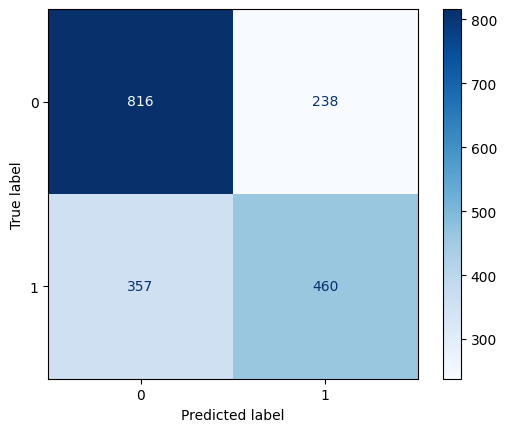

In [426]:
tree = DecisionTreeClassifier(max_depth=8, criterion='entropy', min_samples_leaf=3, min_samples_split=2, random_state=RANDOM_STATE)
tree.fit(input_train, output_train)
salary_tree = tree.predict(input_test)
render_confusion_matrix(tree, salary_tree, tree.classes_)

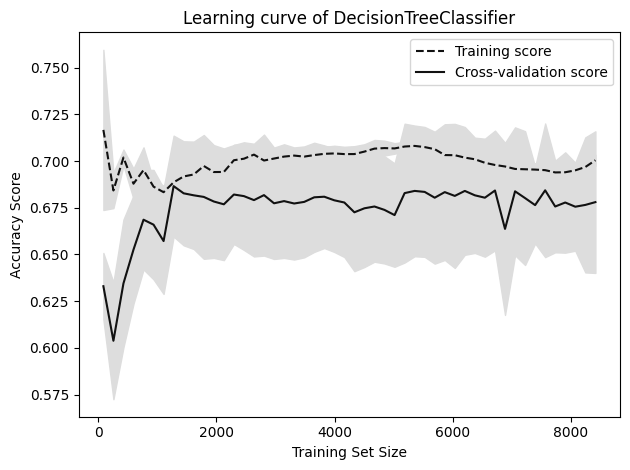

In [427]:
render_learning_curve(tree, "Learning curve of DecisionTreeClassifier", 50)

In [428]:
feat_imp = pandas.DataFrame({'features':features, 'feature_importance': tree.feature_importances_})
feat_imp.sort_values('feature_importance', ascending=False)

,features,feature_importance
128,job_category_Data Analysis,0.266185
216,employee_residence_United States,0.195271
221,experience_level_Mid-level,0.091012
222,experience_level_Senior,0.071373
219,experience_level_Entry-level,0.053620
...,...,...
127,job_category_Cloud and Database,0.000000
18,job_title_BI Data Engineer,0.000000
129,job_category_Data Architecture and Modeling,0.000000
17,job_title_BI Data Analyst,0.000000


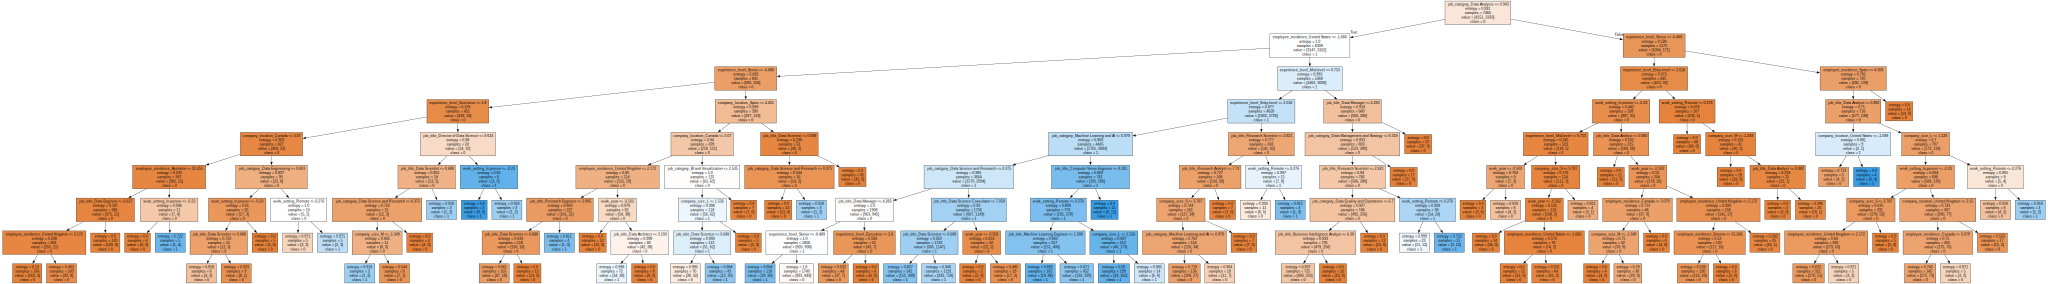

In [429]:
from IPython.display import display
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["0", "1", "2"], feature_names = input_data.columns, impurity=True, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

Score: 0.4901122394441475
              precision    recall  f1-score   support

           0       0.95      0.10      0.18      1054
           1       0.46      0.99      0.63       817

    accuracy                           0.49      1871
   macro avg       0.70      0.55      0.41      1871
weighted avg       0.73      0.49      0.38      1871



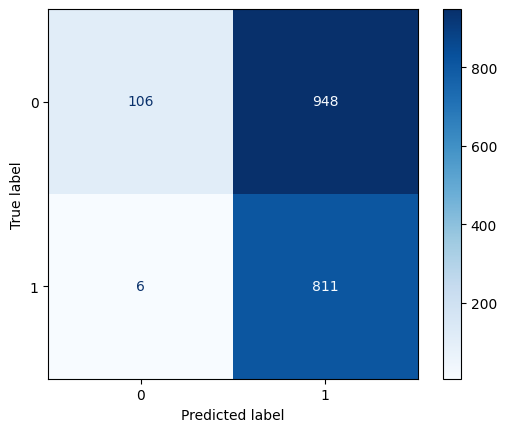

In [430]:
# Naivni Bayes
bayes = GaussianNB()
bayes.fit(input_train, output_train)
ouput_pred_bayes = bayes.predict(input_test)
render_confusion_matrix(bayes, ouput_pred_bayes, bayes.classes_)

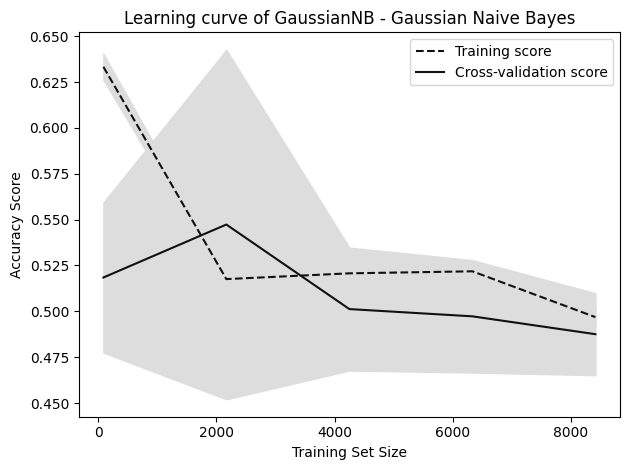

In [431]:
render_learning_curve(bayes, "Learning curve of GaussianNB - Gaussian Naive Bayes", 5)

In [432]:
# RANDOM FOREST:
def random_forest_grid_search():
    randfor = RandomForestClassifier(random_state=RANDOM_STATE)
    parameters = {
        "n_estimators": [50, 200],
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 6],
        "min_samples_leaf": [2, 3],
        "min_samples_split": [2, 3],
    }
    clf_randfor = GridSearchCV(
        randfor, parameters, cv=10, scoring="accuracy"
    )
    clf_randfor.fit(input_train, output_train)
    clf_randfor.best_estimator_.get_params()

random_forest_grid_search() if GRID_SEARCH_CV else "Skipping"

'Skipping'

Score: 0.6841261357562801
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1054
           1       0.66      0.57      0.61       817

    accuracy                           0.68      1871
   macro avg       0.68      0.67      0.67      1871
weighted avg       0.68      0.68      0.68      1871



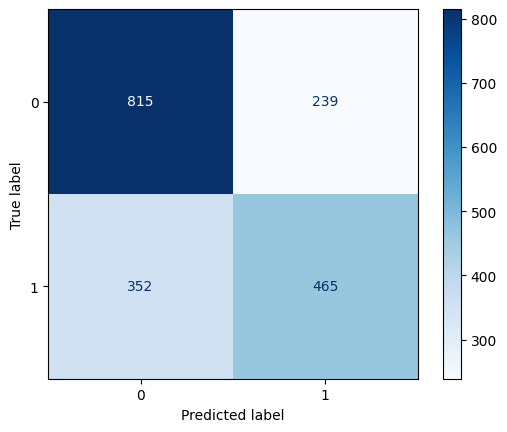

In [433]:
randfor = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=9, min_samples_leaf=4, min_samples_split=2, random_state=RANDOM_STATE)
randfor.fit(input_train, output_train)
y_pred_randfor = randfor.predict(input_test)
render_confusion_matrix(randfor, y_pred_randfor, randfor.classes_)

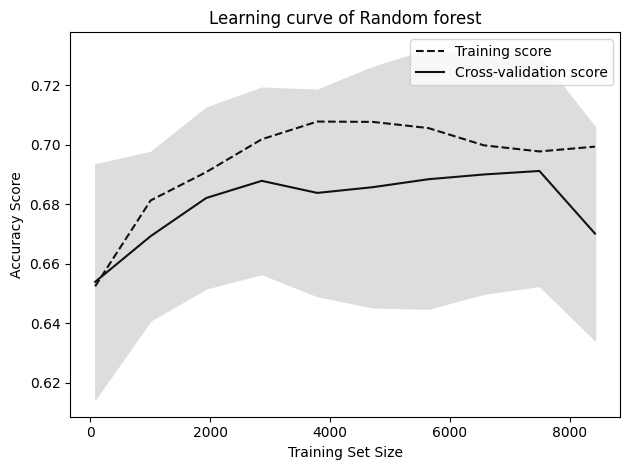

In [434]:
render_learning_curve(randfor, "Learning curve of Random forest", 10)

Score: 0.6958845537145911
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      1054
           1       0.62      0.80      0.70       817

    accuracy                           0.70      1871
   macro avg       0.71      0.71      0.70      1871
weighted avg       0.72      0.70      0.70      1871



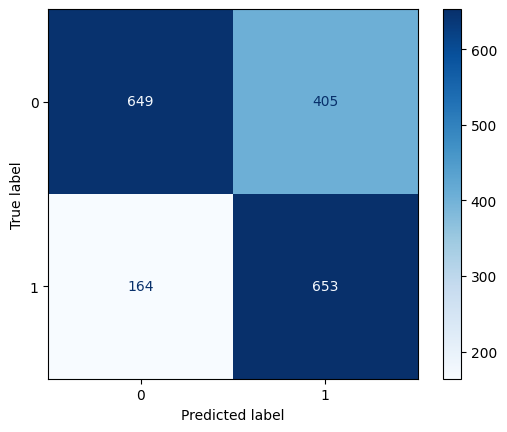

In [435]:
svc = SVC(C=50, gamma=0.001, kernel='rbf', random_state=RANDOM_STATE)
svc.fit(input_train, output_train)
y_pred_svc = svc.predict(input_test)
render_confusion_matrix(svc, y_pred_svc, svc.classes_)

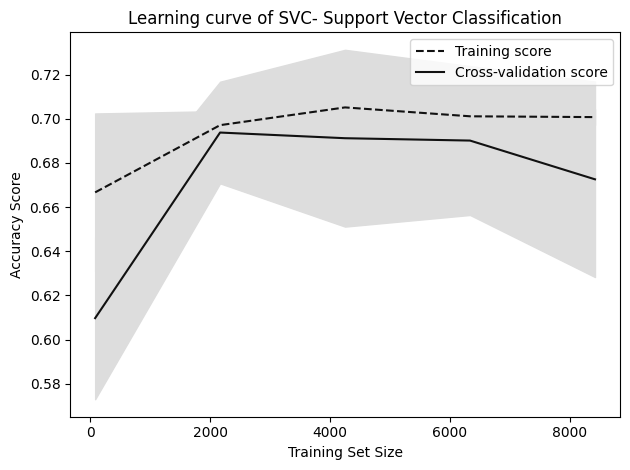

In [436]:
render_learning_curve(svc, "Learning curve of SVC- Support Vector Classification", 5)

Score: 0.692143238909674
              precision    recall  f1-score   support

           0       0.78      0.63      0.70      1054
           1       0.62      0.77      0.69       817

    accuracy                           0.69      1871
   macro avg       0.70      0.70      0.69      1871
weighted avg       0.71      0.69      0.69      1871



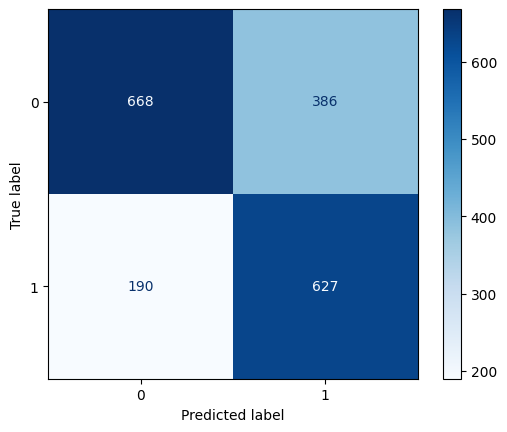

In [437]:
nu_svc = NuSVC(gamma=0.001, kernel='rbf', random_state=RANDOM_STATE)
nu_svc.fit(input_train, output_train)
y_pred_nu_svc = nu_svc.predict(input_test)
render_confusion_matrix(nu_svc, y_pred_nu_svc, nu_svc.classes_)

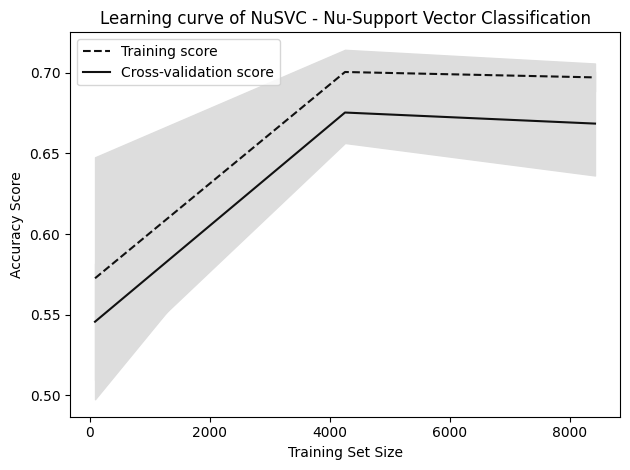

In [438]:
render_learning_curve(nu_svc, "Learning curve of NuSVC - Nu-Support Vector Classification", 3)

Score: 0.6574024585783004
              precision    recall  f1-score   support

           0       0.82      0.50      0.62      1054
           1       0.57      0.85      0.69       817

    accuracy                           0.66      1871
   macro avg       0.69      0.68      0.65      1871
weighted avg       0.71      0.66      0.65      1871



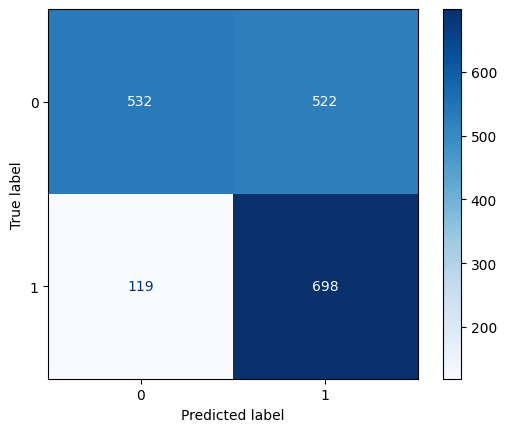

In [439]:
extra_tree = ExtraTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=4, min_samples_split=2, random_state=RANDOM_STATE)
extra_tree.fit(input_train, output_train)
y_pred_extra_tree = extra_tree.predict(input_test)
render_confusion_matrix(extra_tree, y_pred_extra_tree, extra_tree.classes_)

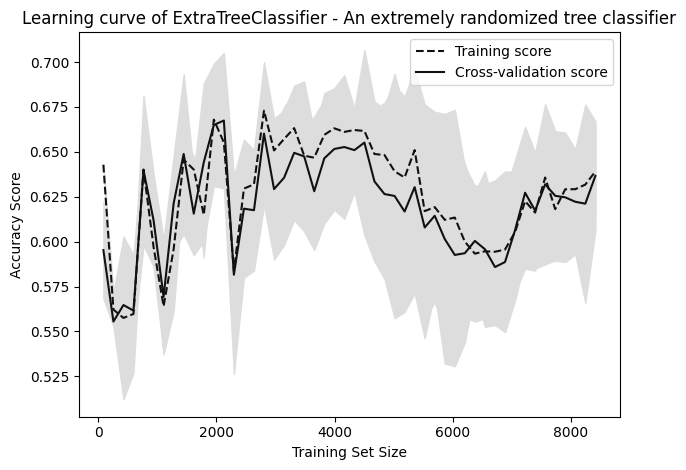

In [440]:
render_learning_curve(extra_tree, "Learning curve of ExtraTreeClassifier - An extremely randomized tree classifier")

Score: 0.7022982362373063
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1054
           1       0.67      0.62      0.64       817

    accuracy                           0.70      1871
   macro avg       0.70      0.69      0.69      1871
weighted avg       0.70      0.70      0.70      1871



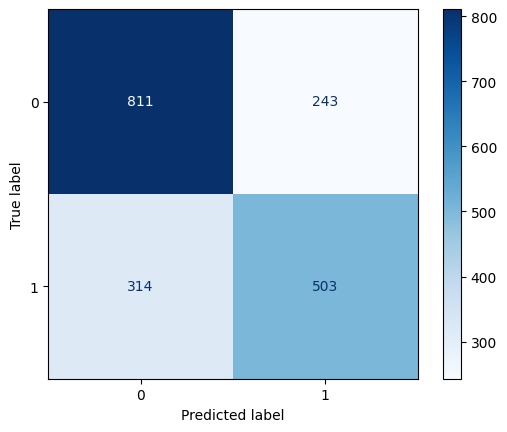

In [446]:
k_neighbors = KNeighborsClassifier(n_neighbors=10)
k_neighbors.fit(input_train, output_train)
k_neighbors_pred_output = k_neighbors.predict(input_test)
render_confusion_matrix(k_neighbors, k_neighbors_pred_output, k_neighbors.classes_)

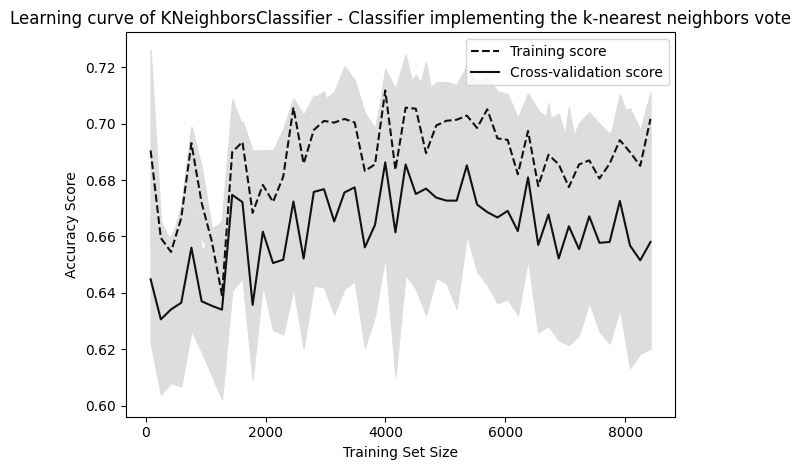

In [447]:
render_learning_curve(k_neighbors, "Learning curve of KNeighborsClassifier - Classifier implementing the k-nearest neighbors vote")

Score: 0.7022982362373063
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      1054
           1       0.65      0.71      0.67       817

    accuracy                           0.70      1871
   macro avg       0.70      0.70      0.70      1871
weighted avg       0.71      0.70      0.70      1871



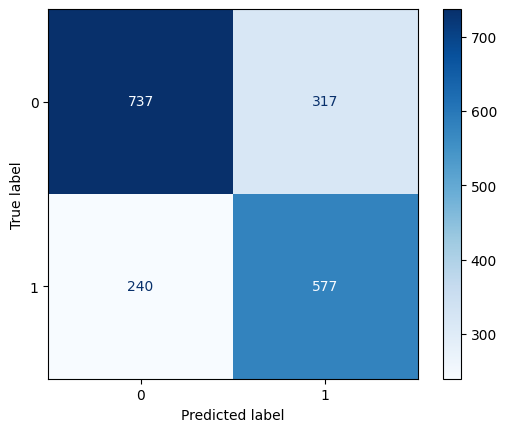

In [455]:
mlp = MLPClassifier((3,), activation='relu')
mlp.fit(input_train, output_train)
mlp_pred_output = mlp.predict(input_test)
render_confusion_matrix(mlp, mlp_pred_output, mlp.classes_)

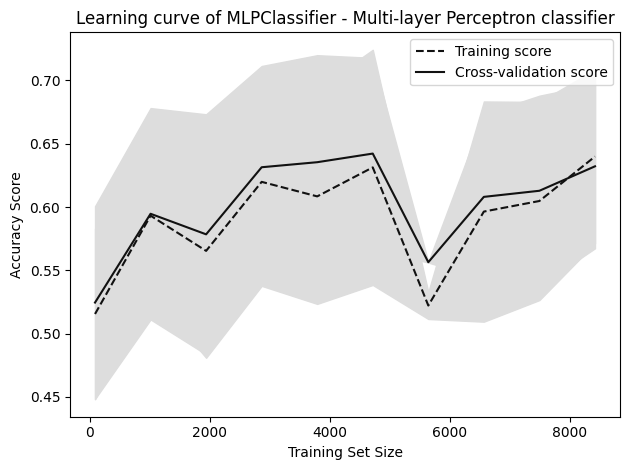

In [457]:
render_learning_curve(mlp, "Learning curve of MLPClassifier - Multi-layer Perceptron classifier", 10)